In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# 自訂損失函數
class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, output, target, r_pred_shue):
        mse_loss = nn.MSELoss()(output, target)
        mse_loss_r_pred_shue = nn.MSELoss()(output, r_pred_shue)
        final_loss = mse_loss + mse_loss_r_pred_shue
        return final_loss

C:\Users\User\AppData\Local\Temp\ipykernel_11444\2565778153.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
df = pd.read_csv('training_data.csv')
df

,date,Bz,Dp,X_GSM_r,Y_GSM_r,Z_GSM_r,R,r,theta
0,2007-04-21 23:35:24,1.325000,1.541882,2.04513,14.148948,2.828270,14.428854,14.573071,1.427248
1,2007-04-21 21:01:06,0.735000,1.684761,3.07664,13.420758,2.520253,13.655344,13.997647,1.345445
2,2007-04-24 12:48:05,0.555000,1.636927,3.25282,13.359627,3.881805,13.912155,14.287368,1.331962
3,2007-04-24 12:58:20,1.095000,1.821343,3.18863,13.395745,3.958515,13.968386,14.327707,1.337112
4,2007-04-24 15:34:45,0.770000,1.620260,2.11343,13.954823,4.071508,14.536652,14.689481,1.420491
...,...,...,...,...,...,...,...,...,...
34993,2015-12-24 17:36:35,-0.650000,2.419949,7.24000,-8.457936,-3.112683,9.012518,11.560410,-0.862829
34994,2015-12-24 17:40:23,-1.975000,2.376666,7.32000,-8.360967,-3.025661,8.891591,11.517065,-0.851685
34995,2015-12-29 23:53:24,0.440000,1.379989,8.50040,-8.115725,-4.066192,9.077384,12.436065,-0.762252
34996,2015-12-29 23:55:00,0.436667,1.380572,8.54000,-8.110883,-4.098030,9.087369,12.470440,-0.759632


In [ ]:
# define r0
def r0(Bz, P):
    return (9.33181349 + 1.30888624 * np.tanh(0.2132126 * (Bz + 11.19067442)) + -0.56890731 * np.tanh(0.47984631 * (Bz + -7.18839244))) * (P ** (-1/6.22393778))

# define alpha
def alpha(Bz, P):
    return (4.93329340e-01 + -3.50551013e-04 * Bz) * (P ** (1/1.19198979e+01))

def r_hou(Bz, P, theta):
    return r0(Bz, P) * ((2/(1+np.cos(theta)))**(alpha(Bz, P)))

df['r_pred_shue'] = r_hou(df['Bz'], df['Dp'], df['theta'])
df.dropna(inplace=True)
df

,date,Bz,Dp,X_GSM_r,Y_GSM_r,Z_GSM_r,R,r,theta,r_pred_shue
0,2007-04-21 23:35:24,1.325000,1.541882,2.04513,14.148948,2.828270,14.428854,14.573071,1.427248,13.896637
1,2007-04-21 21:01:06,0.735000,1.684761,3.07664,13.420758,2.520253,13.655344,13.997647,1.345445,13.256521
2,2007-04-24 12:48:05,0.555000,1.636927,3.25282,13.359627,3.881805,13.912155,14.287368,1.331962,13.236455
3,2007-04-24 12:58:20,1.095000,1.821343,3.18863,13.395745,3.958515,13.968386,14.327707,1.337112,13.069124
4,2007-04-24 15:34:45,0.770000,1.620260,2.11343,13.954823,4.071508,14.536652,14.689481,1.420491,13.761089
...,...,...,...,...,...,...,...,...,...,...
34993,2015-12-24 17:36:35,-0.650000,2.419949,7.24000,-8.457936,-3.112683,9.012518,11.560410,-0.862829,10.743512
34994,2015-12-24 17:40:23,-1.975000,2.376666,7.32000,-8.360967,-3.025661,8.891591,11.517065,-0.851685,10.724703
34995,2015-12-29 23:53:24,0.440000,1.379989,8.50040,-8.115725,-4.066192,9.077384,12.436065,-0.762252,11.458042
34996,2015-12-29 23:55:00,0.436667,1.380572,8.54000,-8.110883,-4.098030,9.087369,12.470440,-0.759632,11.451197


In [ ]:
# from sklearn.model_selection import train_test_split

# df, df_test = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
# 拆分資料為輸入和輸出
X = df[['Bz', 'Dp', 'theta']].values
y_true = df['r'].values.reshape(-1, 1)
r_pred_shue = df['r_pred_shue'].values.reshape(-1, 1)

# 建立模型
model_pinn = nn.Sequential(
    nn.Linear(3, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

# 定義損失函數和優化器
criterion = CustomLoss()
optimizer = optim.RMSprop(model_pinn.parameters())

# 訓練模型
num_epochs = 250
batch_size = 64

loss_record_pinn = []

for epoch in range(num_epochs):
    for i in range(0, len(X), batch_size):
        batch_X = torch.tensor(X[i:i+batch_size]).float()
        batch_y_true = torch.tensor(y_true[i:i+batch_size]).float()
        batch_r_pred_shue = torch.tensor(r_pred_shue[i:i+batch_size]).float()
        
        optimizer.zero_grad()
        
        output = model_pinn(batch_X)
        loss = criterion(output, batch_y_true, batch_r_pred_shue)
        loss.backward()
        
        optimizer.step()
        
        loss_record_pinn.append(loss.item())
        
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch 1/100, Loss: 8.1986
Epoch 2/100, Loss: 6.0130
Epoch 3/100, Loss: 4.8356
Epoch 4/100, Loss: 4.5463
Epoch 5/100, Loss: 4.4097
Epoch 6/100, Loss: 4.4827
Epoch 7/100, Loss: 4.6215
Epoch 8/100, Loss: 4.6911
Epoch 9/100, Loss: 4.7318
Epoch 10/100, Loss: 4.7157
Epoch 11/100, Loss: 4.7816
Epoch 12/100, Loss: 4.7643
Epoch 13/100, Loss: 4.7841
Epoch 14/100, Loss: 4.8418
Epoch 15/100, Loss: 4.8145
Epoch 16/100, Loss: 4.8745
Epoch 17/100, Loss: 4.9098
Epoch 18/100, Loss: 4.8913
Epoch 19/100, Loss: 4.7383
Epoch 20/100, Loss: 4.9136
Epoch 21/100, Loss: 4.9645
Epoch 22/100, Loss: 4.9873
Epoch 23/100, Loss: 5.0033
Epoch 24/100, Loss: 5.0121
Epoch 25/100, Loss: 4.9955
Epoch 26/100, Loss: 4.9683
Epoch 27/100, Loss: 5.0272
Epoch 28/100, Loss: 5.0193
Epoch 29/100, Loss: 4.9575
Epoch 30/100, Loss: 4.9826
Epoch 31/100, Loss: 5.0102
Epoch 32/100, Loss: 4.9676
Epoch 33/100, Loss: 4.8988
Epoch 34/100, Loss: 4.9144
Epoch 35/100, Loss: 4.8296
Epoch 36/100, Loss: 4.9253
Epoch 37/100, Loss: 4.8809
Epoch 38/1

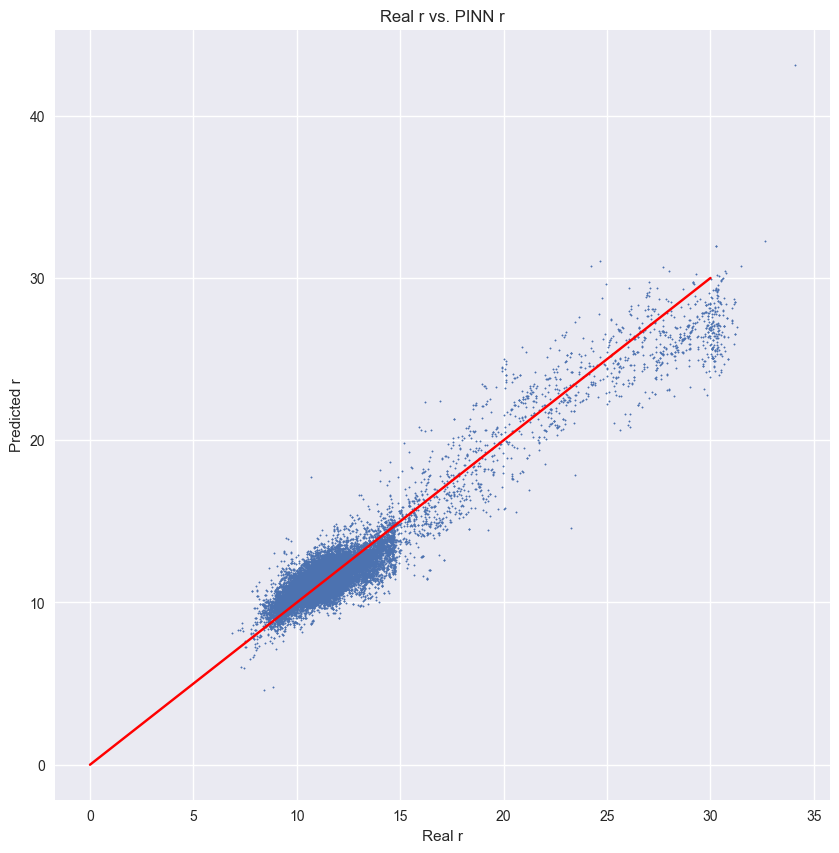

In [ ]:
y_pred_pinn = model_pinn(torch.tensor(X).float()).detach().numpy()
plt.figure(figsize = (10, 10))
plt.scatter(y_true, y_pred_pinn, s = 1)
plt.plot([0, 30], [0, 30], 'r')
plt.xlabel('Real r')
plt.ylabel('Predicted r')
plt.title('Real r vs. PINN r')
plt.show()

In [ ]:
df['r_pinn'] = y_pred_pinn
# calculate the MSE of r_pred_shue and nn_pred
from sklearn.metrics import mean_squared_error
print('RMSE of r_pred_shue: ', np.sqrt(mean_squared_error(df['r'], df['r_pred_shue'])))
print('RMSE of pinn_pred: ', np.sqrt(mean_squared_error(df['r'], df['r_pinn'])))

RMSE of r_pred_shue:  1.1923274804808361
RMSE of pinn_pred:  0.9098757011234614


In [ ]:
# 拆分資料為輸入和輸出
X = df[['Bz', 'Dp', 'theta']].values
y_true = df['r'].values.reshape(-1, 1)


# 建立模型
model_nn = nn.Sequential(
    nn.Linear(3, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

# 定義損失函數和優化器
criterion = nn.MSELoss()
optimizer = optim.RMSprop(model_nn.parameters())


loss_record_nn = []

# 訓練模型
num_epochs = 250
batch_size = 64
for epoch in range(num_epochs):
    for i in range(0, len(X), batch_size):
        batch_X = torch.tensor(X[i:i+batch_size]).float()
        batch_y_true = torch.tensor(y_true[i:i+batch_size]).float()
        
        optimizer.zero_grad()
        
        output = model_nn(batch_X)
        loss = criterion(output, batch_y_true)
        loss.backward()
        
        optimizer.step()
        
        loss_record_nn.append(loss.item())
        
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch 1/100, Loss: 4.0330
Epoch 2/100, Loss: 2.8832
Epoch 3/100, Loss: 2.5197
Epoch 4/100, Loss: 1.8472
Epoch 5/100, Loss: 1.4235
Epoch 6/100, Loss: 1.3430
Epoch 7/100, Loss: 1.3289
Epoch 8/100, Loss: 1.4349
Epoch 9/100, Loss: 1.4699
Epoch 10/100, Loss: 1.5304
Epoch 11/100, Loss: 1.5443
Epoch 12/100, Loss: 1.5147
Epoch 13/100, Loss: 1.4727
Epoch 14/100, Loss: 1.5426
Epoch 15/100, Loss: 1.5886
Epoch 16/100, Loss: 1.6357
Epoch 17/100, Loss: 1.7575
Epoch 18/100, Loss: 1.6869
Epoch 19/100, Loss: 1.5923
Epoch 20/100, Loss: 1.7605
Epoch 21/100, Loss: 1.7285
Epoch 22/100, Loss: 1.8135
Epoch 23/100, Loss: 1.8896
Epoch 24/100, Loss: 1.9051
Epoch 25/100, Loss: 2.0075
Epoch 26/100, Loss: 1.9721
Epoch 27/100, Loss: 1.9348
Epoch 28/100, Loss: 1.8974
Epoch 29/100, Loss: 1.9141
Epoch 30/100, Loss: 1.9102
Epoch 31/100, Loss: 1.9170
Epoch 32/100, Loss: 1.8988
Epoch 33/100, Loss: 1.8736
Epoch 34/100, Loss: 1.8724
Epoch 35/100, Loss: 1.9222
Epoch 36/100, Loss: 1.8830
Epoch 37/100, Loss: 1.8933
Epoch 38/1

In [ ]:
# plot the loss
plt.figure(figsize = (10, 10))
plt.plot(loss_record_pinn, label = 'PINN')
plt.plot(loss_record_nn, label = 'NN')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration')
plt.show()

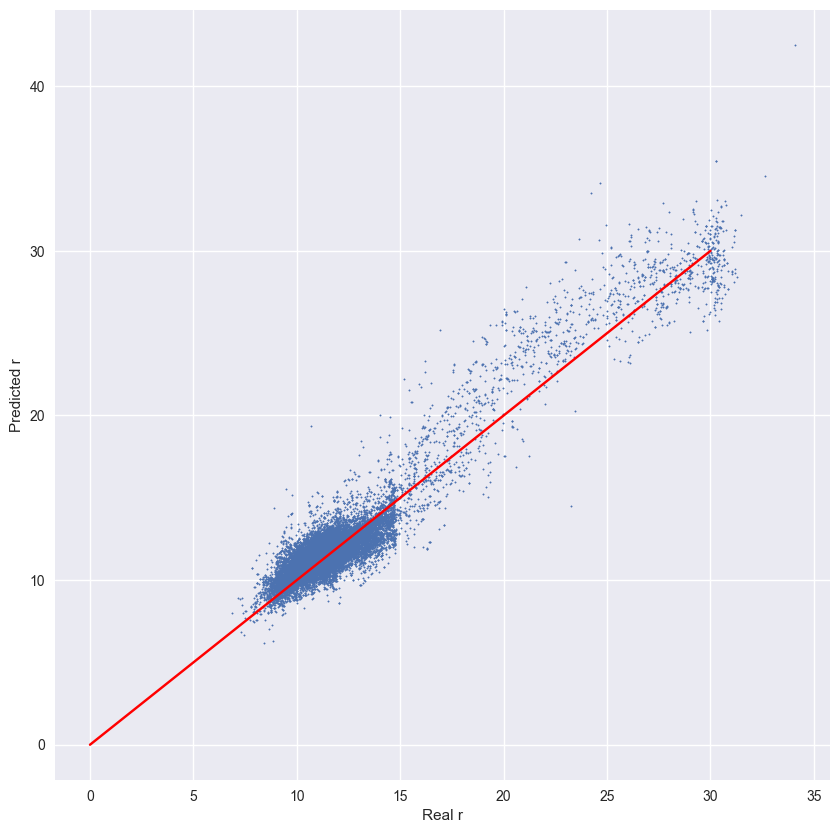

,date,Bz,Dp,X_GSM_r,Y_GSM_r,Z_GSM_r,R,r,theta,r_pred_shue,r_pinn,r_nn
0,2007-04-21 23:35:24,1.325000,1.541882,2.04513,14.148948,2.828270,14.428854,14.573071,1.427248,13.896637,14.626182,14.407835
1,2007-04-21 21:01:06,0.735000,1.684761,3.07664,13.420758,2.520253,13.655344,13.997647,1.345445,13.256521,13.987832,13.706670
2,2007-04-24 12:48:05,0.555000,1.636927,3.25282,13.359627,3.881805,13.912155,14.287368,1.331962,13.236455,13.937087,13.721176
3,2007-04-24 12:58:20,1.095000,1.821343,3.18863,13.395745,3.958515,13.968386,14.327707,1.337112,13.069124,13.856050,13.450088
4,2007-04-24 15:34:45,0.770000,1.620260,2.11343,13.954823,4.071508,14.536652,14.689481,1.420491,13.761089,14.467578,14.150124
...,...,...,...,...,...,...,...,...,...,...,...,...
34993,2015-12-24 17:36:35,-0.650000,2.419949,7.24000,-8.457936,-3.112683,9.012518,11.560410,-0.862829,10.743512,10.783471,10.831682
34994,2015-12-24 17:40:23,-1.975000,2.376666,7.32000,-8.360967,-3.025661,8.891591,11.517065,-0.851685,10.724703,10.700741,10.667448
34995,2015-12-29 23:53:24,0.440000,1.379989,8.50040,-8.115725,-4.066192,9.077384,12.436065,-0.762252,11.458042,11.666937,11.931833
34996,2015-12-29 23:55:00,0.436667,1.380572,8.54000,-8.110883,-4.098030,9.087369,12.470440,-0.759632,11.451197,11.662340,11.927782


In [108]:
y_pred_nn = model_nn(torch.tensor(X).float()).detach().numpy()
plt.figure(figsize = (10, 10))
plt.scatter(y_true, y_pred_nn, s = 1)
plt.plot([0, 30], [0, 30], 'r')
plt.xlabel('Real r')
plt.ylabel('Predicted r')
plt.show()

df['r_nn'] = y_pred_nn
df

In [109]:
print('RMSE of r_pred_shue: ', np.sqrt(mean_squared_error(df['r'], df['r_pred_shue'])))
print('RMSE of pinn_pred: ', np.sqrt(mean_squared_error(df['r'], df['r_pinn'])))
print('RMSE of nn_pred: ', np.sqrt(mean_squared_error(df['r'], df['r_nn'])))

RMSE of r_pred_shue:  1.1923274804808361
RMSE of pinn_pred:  0.9098757011234614
RMSE of nn_pred:  0.9500634116345754


In [110]:
# make a 2D plane of pinn_pred for different Bz and P
Bz = np.linspace(-20, 20, 100)
P = np.linspace(0.5, 40, 100)

Bz, P = np.meshgrid(Bz, P)
theta = np.zeros((100, 100))

# Bz, P, theta should be tensors
Bz = torch.tensor(Bz).float()
P = torch.tensor(P).float()
theta = torch.tensor(theta).float()

# predict r from Bz, P, theta
r_pred_pinn_list = []
for i in range(100):
    for j in range(100):
        r_pred_pinn_list.append(model_pinn(torch.tensor([Bz[i][j], P[i][j], theta[i][j]]).float()).detach().numpy())
        
r_pred_pinn = np.array(r_pred_pinn_list).reshape(100, 100)
r_pred_pinn.shape

(100, 100)

C:\Users\User\AppData\Local\Temp\ipykernel_11444\3618936092.py:3: RuntimeWarning: divide by zero encountered in power
  return (9.33181349 + 1.30888624 * np.tanh(0.2132126 * (Bz + 11.19067442)) + -0.56890731 * np.tanh(0.47984631 * (Bz + -7.18839244))) * (P ** (-1/6.22393778))


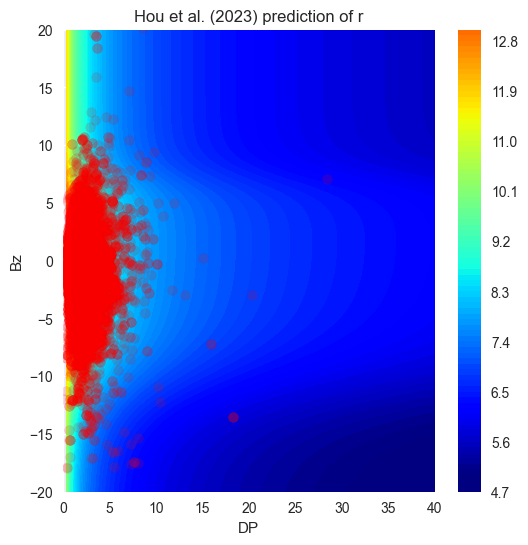

In [111]:
# make a 2D plane of r_pred_shue for different Bz and P
Bz = np.linspace(-20, 20, 100)
P = np.linspace(0, 40, 100)

Bz, P = np.meshgrid(Bz, P)

r_pred_shue_list = r_hou(Bz, P, 0)
r_pred_shue_list.shape

plt.figure(figsize = (6, 6))
plt.contourf(P, Bz, r_pred_shue_list, 100, cmap = 'jet', vmin = 5, vmax = 15)
plt.colorbar()
plt.scatter(df['Dp'], df['Bz'], alpha = 0.15, c = 'r')
plt.xlabel('DP')
plt.ylabel('Bz')
plt.title('Hou et al. (2023) prediction of r')
plt.xlim(0, 40)
plt.ylim(-20, 20)
plt.show()

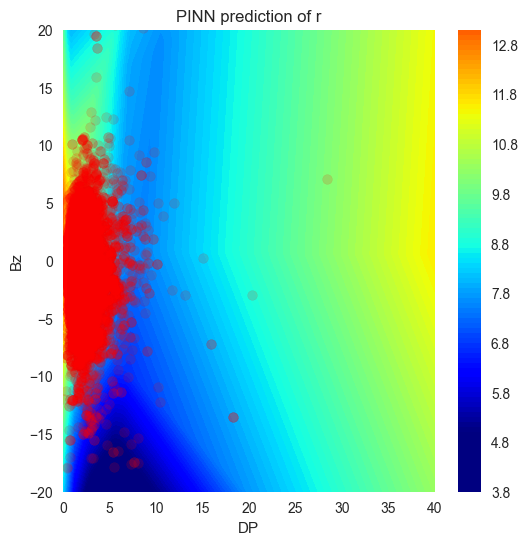

In [112]:
plt.figure(figsize = (6, 6))
plt.contourf(P, Bz, r_pred_pinn, 100, cmap = 'jet', vmin = 5, vmax = 15)
plt.colorbar()
plt.scatter(df['Dp'], df['Bz'], alpha = 0.15, c = 'r')
plt.xlabel('DP')
plt.ylabel('Bz')
plt.title('PINN prediction of r')
plt.xlim(0, 40)
plt.ylim(-20, 20)
plt.show()

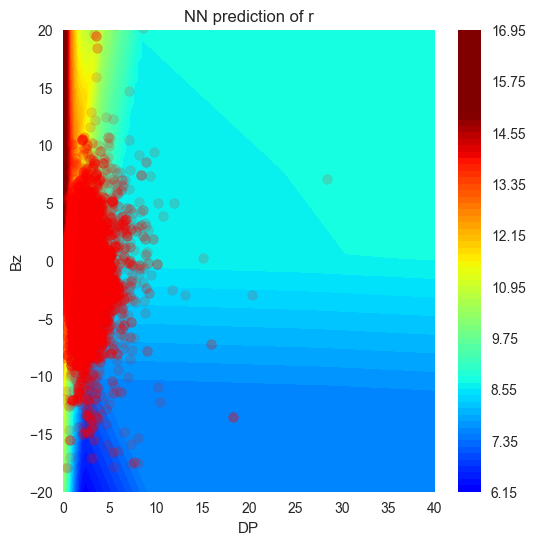

In [113]:
# make a 2D plane of pinn_pred for different Bz and P
Bz = np.linspace(-20, 20, 100)
P = np.linspace(0, 40, 100)

Bz, P = np.meshgrid(Bz, P)
theta = np.zeros((100, 100))

# Bz, P, theta should be tensors
Bz = torch.tensor(Bz).float()
P = torch.tensor(P).float()
theta = torch.tensor(theta).float()

# predict r from Bz, P, theta
r_pred_nn_list = []
for i in range(100):
    for j in range(100):
        r_pred_nn_list.append(model_nn(torch.tensor([Bz[i][j], P[i][j], theta[i][j]]).float()).detach().numpy())
        
r_pred_nn = np.array(r_pred_nn_list).reshape(100, 100)
r_pred_nn.shape

plt.figure(figsize = (6, 6))
plt.contourf(P, Bz, r_pred_nn, 100, cmap = 'jet', vmin = 5, vmax = 15)
plt.colorbar()
plt.scatter(df['Dp'], df['Bz'], alpha = 0.15, c = 'r')
plt.xlabel('DP')
plt.ylabel('Bz')
plt.title('NN prediction of r')
plt.xlim(0, 40)
plt.ylim(-20, 20)
plt.show()

# HOU

In [114]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# 自訂損失函數
class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, output, target, r_pred_shue):
        mse_loss = nn.MSELoss()(output, target)
        mse_loss_r_pred_shue = nn.MSELoss()(output, r_pred_shue)
        final_loss = mse_loss + mse_loss_r_pred_shue
        return final_loss

C:\Users\User\AppData\Local\Temp\ipykernel_11444\2565778153.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [115]:
df = pd.read_csv('training_data.csv')
# define r0
def r0(Bz, P):
    return (9.33181349 + 1.30888624 * np.tanh(0.2132126 * (Bz + 11.19067442)) + -0.56890731 * np.tanh(0.47984631 * (Bz + -7.18839244))) * (P ** (-1/6.22393778))

# define alpha
def alpha(Bz, P):
    return (4.93329340e-01 + -3.50551013e-04 * Bz) * (P ** (1/1.19198979e+01))

def r_hou(Bz, P, theta):
    return r0(Bz, P) * ((2/(1+np.cos(theta)))**(alpha(Bz, P)))

df['r_pred_hou'] = r_hou(df['Bz'], df['Dp'], df['theta'])
df.dropna(inplace=True)
df

,date,Bz,Dp,X_GSM_r,Y_GSM_r,Z_GSM_r,R,r,theta,r_pred_shue
0,2007-04-21 23:35:24,1.325000,1.541882,2.04513,14.148948,2.828270,14.428854,14.573071,1.427248,13.896637
1,2007-04-21 21:01:06,0.735000,1.684761,3.07664,13.420758,2.520253,13.655344,13.997647,1.345445,13.256521
2,2007-04-24 12:48:05,0.555000,1.636927,3.25282,13.359627,3.881805,13.912155,14.287368,1.331962,13.236455
3,2007-04-24 12:58:20,1.095000,1.821343,3.18863,13.395745,3.958515,13.968386,14.327707,1.337112,13.069124
4,2007-04-24 15:34:45,0.770000,1.620260,2.11343,13.954823,4.071508,14.536652,14.689481,1.420491,13.761089
...,...,...,...,...,...,...,...,...,...,...
34993,2015-12-24 17:36:35,-0.650000,2.419949,7.24000,-8.457936,-3.112683,9.012518,11.560410,-0.862829,10.743512
34994,2015-12-24 17:40:23,-1.975000,2.376666,7.32000,-8.360967,-3.025661,8.891591,11.517065,-0.851685,10.724703
34995,2015-12-29 23:53:24,0.440000,1.379989,8.50040,-8.115725,-4.066192,9.077384,12.436065,-0.762252,11.458042
34996,2015-12-29 23:55:00,0.436667,1.380572,8.54000,-8.110883,-4.098030,9.087369,12.470440,-0.759632,11.451197


In [116]:
from sklearn.model_selection import train_test_split

df, df_test = train_test_split(df, test_size=0.8, shuffle=True)

In [117]:
# # 拆分資料為輸入和輸出
# X = df[['Bz', 'Dp', 'theta']].values
# y_true = df['r'].values.reshape(-1, 1)
# r_pred_shue = df['r_pred_shue'].values.reshape(-1, 1)

# # 建立模型
# model_pinn = nn.Sequential(
#     nn.Linear(3, 32),
#     nn.ReLU(),
#     nn.Linear(32, 1)
# )

# # 定義損失函數和優化器
# criterion = CustomLoss()
# optimizer = optim.RMSprop(model_pinn.parameters())

# # 訓練模型
# num_epochs = 100
# batch_size = 32
# for epoch in range(num_epochs):
#     for i in range(0, len(X), batch_size):
#         batch_X = torch.tensor(X[i:i+batch_size]).float()
#         batch_y_true = torch.tensor(y_true[i:i+batch_size]).float()
#         batch_r_pred_shue = torch.tensor(r_pred_shue[i:i+batch_size]).float()
        
#         optimizer.zero_grad()
        
#         output = model_pinn(batch_X)
#         loss = criterion(output, batch_y_true, batch_r_pred_shue)
#         loss.backward()
        
#         optimizer.step()
        
#     print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

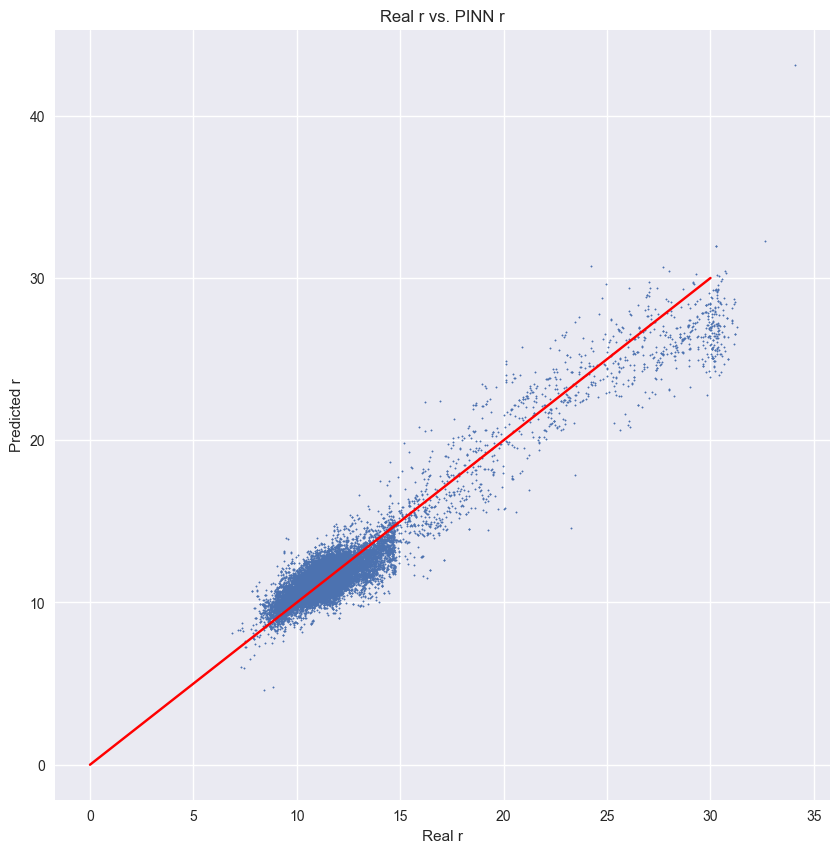

In [118]:
X = df_test[['Bz', 'Dp', 'theta']].values
y_pred_pinn = model_pinn(torch.tensor(X).float()).detach().numpy()
plt.figure(figsize = (10, 10))
plt.scatter(df_test['r'], y_pred_pinn, s = 1)
plt.plot([0, 30], [0, 30], 'r')
plt.xlabel('Real r')
plt.ylabel('Predicted r')
plt.title('Real r vs. PINN r')
plt.show()

In [119]:
df_test['r_pinn'] = y_pred_pinn
# calculate the MSE of r_pred_shue and nn_pred
from sklearn.metrics import mean_squared_error
print('RMSE of r_pred_shue: ', np.sqrt(mean_squared_error(df_test['r'], df_test['r_pred_shue'])))
print('RMSE of pinn_pred: ', np.sqrt(mean_squared_error(df_test['r'], df_test['r_pinn'])))

RMSE of r_pred_shue:  1.2144174265957037
RMSE of pinn_pred:  0.9096785023060835


In [120]:
# 拆分資料為輸入和輸出
X = df[['Bz', 'Dp', 'theta']].values
y_true = df['r'].values.reshape(-1, 1)


# 建立模型
model_nn = nn.Sequential(
    nn.Linear(3, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

# 定義損失函數和優化器
criterion = nn.MSELoss()
optimizer = optim.RMSprop(model_nn.parameters())

# 訓練模型
num_epochs = 100
batch_size = 32
for epoch in range(num_epochs):
    for i in range(0, len(X), batch_size):
        batch_X = torch.tensor(X[i:i+batch_size]).float()
        batch_y_true = torch.tensor(y_true[i:i+batch_size]).float()
        
        optimizer.zero_grad()
        
        output = model_nn(batch_X)
        loss = criterion(output, batch_y_true)
        loss.backward()
        
        optimizer.step()
        
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch 1/100, Loss: 0.7435
Epoch 2/100, Loss: 0.5055
Epoch 3/100, Loss: 0.4706
Epoch 4/100, Loss: 0.4177
Epoch 5/100, Loss: 0.3994
Epoch 6/100, Loss: 0.4184
Epoch 7/100, Loss: 0.4258
Epoch 8/100, Loss: 0.4284
Epoch 9/100, Loss: 0.4210
Epoch 10/100, Loss: 0.4030
Epoch 11/100, Loss: 0.3896
Epoch 12/100, Loss: 0.4003
Epoch 13/100, Loss: 0.3857
Epoch 14/100, Loss: 0.3932
Epoch 15/100, Loss: 0.3942
Epoch 16/100, Loss: 0.3941
Epoch 17/100, Loss: 0.4012
Epoch 18/100, Loss: 0.3872
Epoch 19/100, Loss: 0.3967
Epoch 20/100, Loss: 0.4063
Epoch 21/100, Loss: 0.4011
Epoch 22/100, Loss: 0.4107
Epoch 23/100, Loss: 0.4121
Epoch 24/100, Loss: 0.4031
Epoch 25/100, Loss: 0.3826
Epoch 26/100, Loss: 0.3891
Epoch 27/100, Loss: 0.3955
Epoch 28/100, Loss: 0.3892
Epoch 29/100, Loss: 0.3811
Epoch 30/100, Loss: 0.3869
Epoch 31/100, Loss: 0.3865
Epoch 32/100, Loss: 0.3927
Epoch 33/100, Loss: 0.4134
Epoch 34/100, Loss: 0.3936
Epoch 35/100, Loss: 0.4011
Epoch 36/100, Loss: 0.4220
Epoch 37/100, Loss: 0.4170
Epoch 38/1

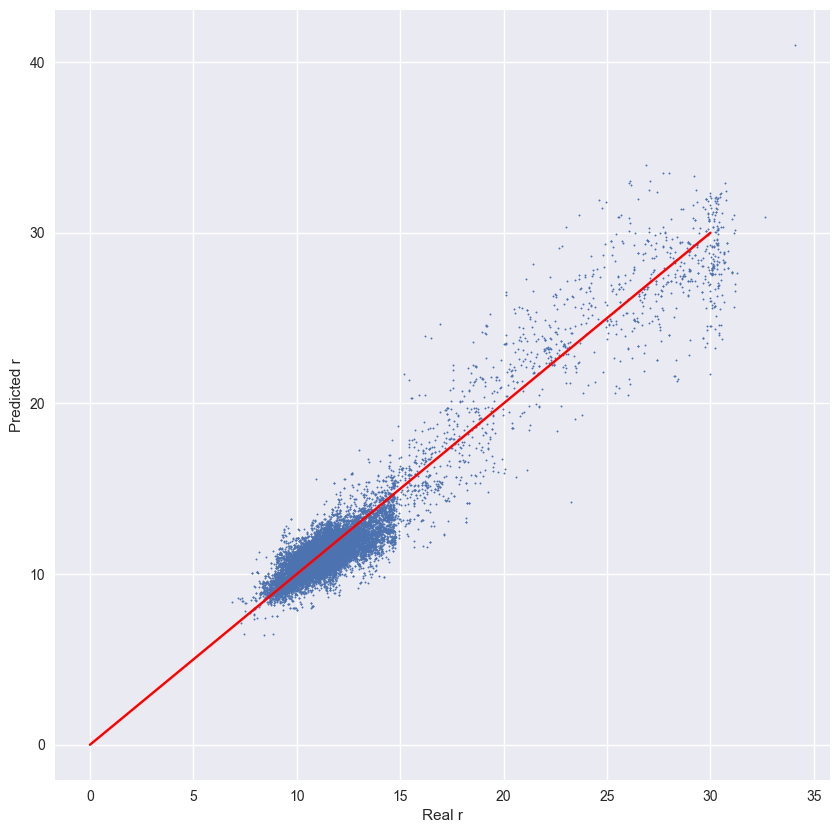

In [121]:
X = df_test[['Bz', 'Dp', 'theta']].values
y_pred_nn = model_nn(torch.tensor(X).float()).detach().numpy()
plt.figure(figsize = (10, 10))
plt.scatter(df_test['r'], y_pred_nn, s = 1)
plt.plot([0, 30], [0, 30], 'r')
plt.xlabel('Real r')
plt.ylabel('Predicted r')
plt.show()

df_test['r_nn'] = y_pred_nn

In [122]:
print('RMSE of r_pred_shue: ', np.sqrt(mean_squared_error(df_test['r'], df_test['r_pred_shue'])))
print('RMSE of pinn_pred: ', np.sqrt(mean_squared_error(df_test['r'], df_test['r_pinn'])))
print('RMSE of nn_pred: ', np.sqrt(mean_squared_error(df_test['r'], df_test['r_nn'])))

RMSE of r_pred_shue:  1.2144174265957037
RMSE of pinn_pred:  0.9096785023060835
RMSE of nn_pred:  0.9369023838520608


# L1 & L2

In [123]:
# 拆分資料為輸入和輸出
X = df[['Bz', 'Dp', 'theta']].values
y_true = df['r'].values.reshape(-1, 1)

In [124]:
# set up L1 regularization
l1_lambda = 0.001

# 建立模型
model_nn_l1 = nn.Sequential(
    nn.Linear(3, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

# 定義損失函數和優化器
criterion = nn.MSELoss()
optimizer = optim.RMSprop(model_nn_l1.parameters())

# 訓練模型
num_epochs = 100
batch_size = 32
for epoch in range(num_epochs):
    for i in range(0, len(X), batch_size):
        batch_X = torch.tensor(X[i:i+batch_size]).float()
        batch_y_true = torch.tensor(y_true[i:i+batch_size]).float()
        
        optimizer.zero_grad()
        
        output = model_nn_l1(batch_X)
        loss = criterion(output, batch_y_true)
        
        # add L1 regularization
        l1_norm = sum(p.abs().sum() for p in model_nn_l1.parameters())
        loss += l1_lambda * l1_norm
        
        loss.backward()
        
        optimizer.step()
        
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")
    

Epoch 1/100, Loss: 0.7684
Epoch 2/100, Loss: 0.5004
Epoch 3/100, Loss: 0.4374
Epoch 4/100, Loss: 0.4104
Epoch 5/100, Loss: 0.4067
Epoch 6/100, Loss: 0.4057
Epoch 7/100, Loss: 0.4079
Epoch 8/100, Loss: 0.4053
Epoch 9/100, Loss: 0.4176
Epoch 10/100, Loss: 0.4419
Epoch 11/100, Loss: 0.4404
Epoch 12/100, Loss: 0.4448
Epoch 13/100, Loss: 0.4510
Epoch 14/100, Loss: 0.4742
Epoch 15/100, Loss: 0.4776
Epoch 16/100, Loss: 0.5001
Epoch 17/100, Loss: 0.5306
Epoch 18/100, Loss: 0.5433
Epoch 19/100, Loss: 0.5205
Epoch 20/100, Loss: 0.5378
Epoch 21/100, Loss: 0.5130
Epoch 22/100, Loss: 0.5017
Epoch 23/100, Loss: 0.5187
Epoch 24/100, Loss: 0.4896
Epoch 25/100, Loss: 0.4965
Epoch 26/100, Loss: 0.4746
Epoch 27/100, Loss: 0.4905
Epoch 28/100, Loss: 0.4914
Epoch 29/100, Loss: 0.5475
Epoch 30/100, Loss: 0.4954
Epoch 31/100, Loss: 0.5008
Epoch 32/100, Loss: 0.5335
Epoch 33/100, Loss: 0.5305
Epoch 34/100, Loss: 0.5480
Epoch 35/100, Loss: 0.5251
Epoch 36/100, Loss: 0.5246
Epoch 37/100, Loss: 0.5227
Epoch 38/1

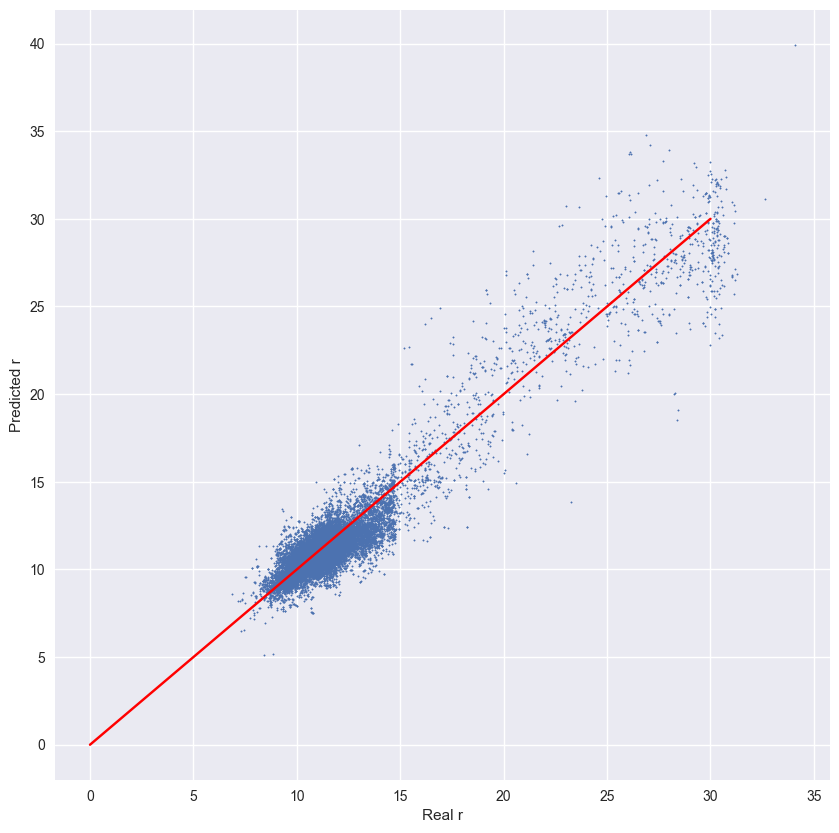

In [125]:
X = df_test[['Bz', 'Dp', 'theta']].values
y_pred_nn_l1 = model_nn_l1(torch.tensor(X).float()).detach().numpy()

plt.figure(figsize = (10, 10))
plt.scatter(df_test['r'], y_pred_nn_l1, s = 1)
plt.plot([0, 30], [0, 30], 'r')
plt.xlabel('Real r')
plt.ylabel('Predicted r')
plt.show()

In [126]:
df_test['r_nn_l1'] = y_pred_nn_l1

print('RMSE of r_pred_shue: ', np.sqrt(mean_squared_error(df_test['r'], df_test['r_pred_shue'])))
print('RMSE of pinn_pred: ', np.sqrt(mean_squared_error(df_test['r'], df_test['r_pinn'])))
print('RMSE of nn_pred: ', np.sqrt(mean_squared_error(df_test['r'], df_test['r_nn'])))
print('RMSE of nn_l1_pred: ', np.sqrt(mean_squared_error(df_test['r'], df_test['r_nn_l1'])))

RMSE of r_pred_shue:  1.2144174265957037
RMSE of pinn_pred:  0.9096785023060835
RMSE of nn_pred:  0.9369023838520608
RMSE of nn_l1_pred:  0.9735829561477903


In [127]:
# set up L2 regularization
X = df[['Bz', 'Dp', 'theta']].values
y_true = df['r'].values.reshape(-1, 1)
l2_lambda = 0.001

# 建立模型
model_nn_l2 = nn.Sequential(
    nn.Linear(3, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

# 定義損失函數和優化器
criterion = nn.MSELoss()
optimizer = optim.RMSprop(model_nn_l2.parameters())

# 訓練模型
num_epochs = 100
batch_size = 32
for epoch in range(num_epochs):
    for i in range(0, len(X), batch_size):
        batch_X = torch.tensor(X[i:i+batch_size]).float()
        batch_y_true = torch.tensor(y_true[i:i+batch_size]).float()
        
        optimizer.zero_grad()
        
        output = model_nn_l2(batch_X)
        loss = criterion(output, batch_y_true)
        
        # add L2 regularization
        l2_norm = sum(p.pow(2.0).sum() for p in model_nn_l2.parameters())
        loss += l2_lambda * l2_norm
        
        loss.backward()
        
        optimizer.step()
        
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch 1/100, Loss: 0.7656
Epoch 2/100, Loss: 0.4171
Epoch 3/100, Loss: 0.4078
Epoch 4/100, Loss: 0.4241
Epoch 5/100, Loss: 0.4253
Epoch 6/100, Loss: 0.4444
Epoch 7/100, Loss: 0.4636
Epoch 8/100, Loss: 0.4494
Epoch 9/100, Loss: 0.4666
Epoch 10/100, Loss: 0.4712
Epoch 11/100, Loss: 0.4819
Epoch 12/100, Loss: 0.4981
Epoch 13/100, Loss: 0.4875
Epoch 14/100, Loss: 0.4718
Epoch 15/100, Loss: 0.4753
Epoch 16/100, Loss: 0.4988
Epoch 17/100, Loss: 0.4677
Epoch 18/100, Loss: 0.4871
Epoch 19/100, Loss: 0.5325
Epoch 20/100, Loss: 0.4906
Epoch 21/100, Loss: 0.4908
Epoch 22/100, Loss: 0.5039
Epoch 23/100, Loss: 0.4913
Epoch 24/100, Loss: 0.5073
Epoch 25/100, Loss: 0.4912
Epoch 26/100, Loss: 0.4798
Epoch 27/100, Loss: 0.5013
Epoch 28/100, Loss: 0.5148
Epoch 29/100, Loss: 0.5041
Epoch 30/100, Loss: 0.5196
Epoch 31/100, Loss: 0.5215
Epoch 32/100, Loss: 0.5285
Epoch 33/100, Loss: 0.5348
Epoch 34/100, Loss: 0.5276
Epoch 35/100, Loss: 0.5211
Epoch 36/100, Loss: 0.5204
Epoch 37/100, Loss: 0.5134
Epoch 38/1

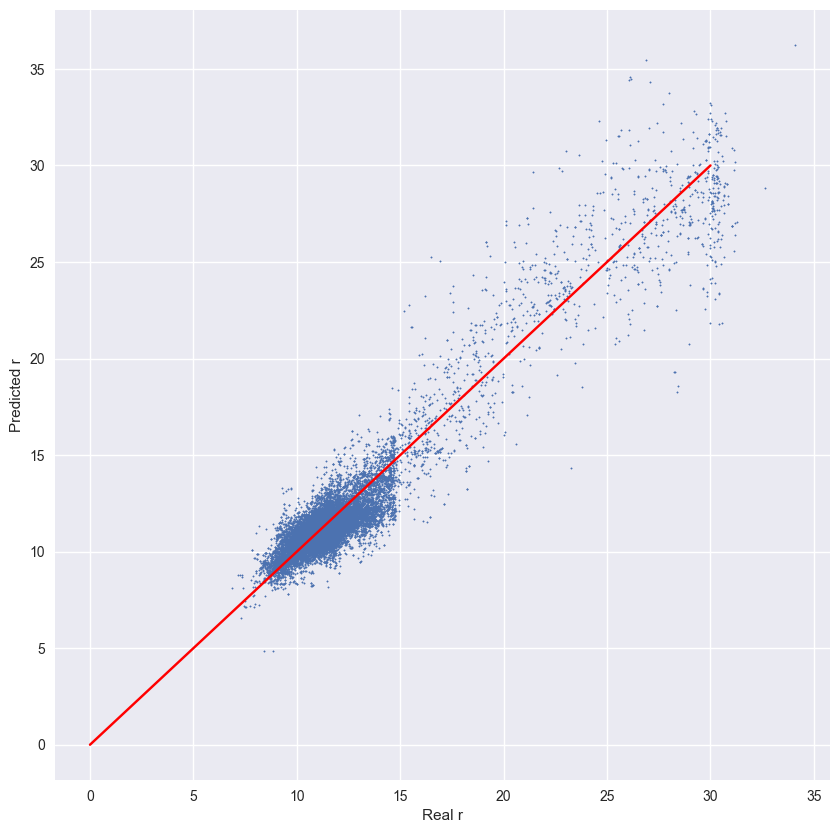

In [128]:
X = df_test[['Bz', 'Dp', 'theta']].values
y_pred_nn_l2 = model_nn_l2(torch.tensor(X).float()).detach().numpy()

plt.figure(figsize = (10, 10))
plt.scatter(df_test['r'], y_pred_nn_l2, s = 1)
plt.plot([0, 30], [0, 30], 'r')
plt.xlabel('Real r')
plt.ylabel('Predicted r')
plt.show()

In [129]:
df_test['r_nn_l2'] = y_pred_nn_l2

print('RMSE of r_pred_shue: ', np.sqrt(mean_squared_error(df_test['r'], df_test['r_pred_shue'])))
print('RMSE of pinn_pred: ', np.sqrt(mean_squared_error(df_test['r'], df_test['r_pinn'])))
print('RMSE of nn_pred: ', np.sqrt(mean_squared_error(df_test['r'], df_test['r_nn'])))
print('RMSE of nn_l1_pred: ', np.sqrt(mean_squared_error(df_test['r'], df_test['r_nn_l1'])))
print('RMSE of nn_l2_pred: ', np.sqrt(mean_squared_error(df_test['r'], df_test['r_nn_l2'])))

RMSE of r_pred_shue:  1.2144174265957037
RMSE of pinn_pred:  0.9096785023060835
RMSE of nn_pred:  0.9369023838520608
RMSE of nn_l1_pred:  0.9735829561477903
RMSE of nn_l2_pred:  0.9469352993686702


In [130]:
X = df[['Bz', 'Dp', 'theta']].values
y_true = df['r'].values.reshape(-1, 1)

# set up elastic regularization
elastic_lambda = 0.001

# 建立模型
model_nn_elastic = nn.Sequential(
    nn.Linear(3, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

# 定義損失函數和優化器
criterion = nn.MSELoss()
optimizer = optim.RMSprop(model_nn_elastic.parameters())

# 訓練模型
num_epochs = 100
batch_size = 32
for epoch in range(num_epochs):
    for i in range(0, len(X), batch_size):
        batch_X = torch.tensor(X[i:i+batch_size]).float()
        batch_y_true = torch.tensor(y_true[i:i+batch_size]).float()
        
        optimizer.zero_grad()
        
        output = model_nn_elastic(batch_X)
        loss = criterion(output, batch_y_true)
        
        # add elastic regularization
        l1_norm = sum(p.abs().sum() for p in model_nn_elastic.parameters())
        l2_norm = sum(p.pow(2.0).sum() for p in model_nn_elastic.parameters())
        loss += elastic_lambda * (l1_norm + l2_norm)
        
        loss.backward()
        
        optimizer.step()
        
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch 1/100, Loss: 0.7373
Epoch 2/100, Loss: 0.5774
Epoch 3/100, Loss: 0.5033
Epoch 4/100, Loss: 0.4890
Epoch 5/100, Loss: 0.5029
Epoch 6/100, Loss: 0.4951
Epoch 7/100, Loss: 0.4964
Epoch 8/100, Loss: 0.4908
Epoch 9/100, Loss: 0.5013
Epoch 10/100, Loss: 0.5075
Epoch 11/100, Loss: 0.5184
Epoch 12/100, Loss: 0.4869
Epoch 13/100, Loss: 0.4904
Epoch 14/100, Loss: 0.4720
Epoch 15/100, Loss: 0.4678
Epoch 16/100, Loss: 0.4760
Epoch 17/100, Loss: 0.4685
Epoch 18/100, Loss: 0.4680
Epoch 19/100, Loss: 0.4785
Epoch 20/100, Loss: 0.4458
Epoch 21/100, Loss: 0.4557
Epoch 22/100, Loss: 0.4621
Epoch 23/100, Loss: 0.4668
Epoch 24/100, Loss: 0.4761
Epoch 25/100, Loss: 0.4761
Epoch 26/100, Loss: 0.4812
Epoch 27/100, Loss: 0.4850
Epoch 28/100, Loss: 0.5033
Epoch 29/100, Loss: 0.5036
Epoch 30/100, Loss: 0.4981
Epoch 31/100, Loss: 0.5007
Epoch 32/100, Loss: 0.5265
Epoch 33/100, Loss: 0.5127
Epoch 34/100, Loss: 0.5118
Epoch 35/100, Loss: 0.5339
Epoch 36/100, Loss: 0.5290
Epoch 37/100, Loss: 0.5276
Epoch 38/1

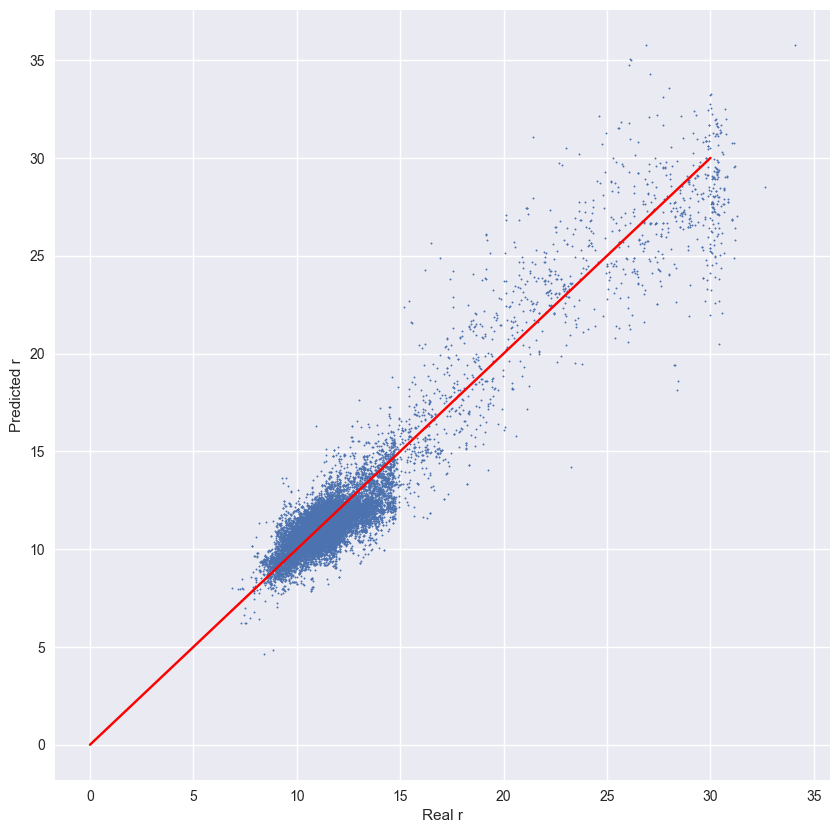

In [131]:
# 拆分資料為輸入和輸出
X = df_test[['Bz', 'Dp', 'theta']].values
y_pred_nn_elastic = model_nn_elastic(torch.tensor(X).float()).detach().numpy()

plt.figure(figsize = (10, 10))
plt.scatter(df_test['r'], y_pred_nn_elastic, s = 1)
plt.plot([0, 30], [0, 30], 'r')
plt.xlabel('Real r')
plt.ylabel('Predicted r')
plt.show()

In [132]:
df_test['r_nn_elastic'] = y_pred_nn_elastic

print('RMSE of r_pred_shue: ', np.sqrt(mean_squared_error(df_test['r'], df_test['r_pred_shue'])))
print('RMSE of pinn_pred: ', np.sqrt(mean_squared_error(df_test['r'], df_test['r_pinn'])))
print('RMSE of nn_pred: ', np.sqrt(mean_squared_error(df_test['r'], df_test['r_nn'])))
print('RMSE of nn_l1_pred: ', np.sqrt(mean_squared_error(df_test['r'], df_test['r_nn_l1'])))
print('RMSE of nn_l2_pred: ', np.sqrt(mean_squared_error(df_test['r'], df_test['r_nn_l2'])))
print('RMSE of nn_elastic_pred: ', np.sqrt(mean_squared_error(df_test['r'], df_test['r_nn_elastic'])))

RMSE of r_pred_shue:  1.2144174265957037
RMSE of pinn_pred:  0.9096785023060835
RMSE of nn_pred:  0.9369023838520608
RMSE of nn_l1_pred:  0.9735829561477903
RMSE of nn_l2_pred:  0.9469352993686702
RMSE of nn_elastic_pred:  0.973278424863079
